In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.constants import h,m_e, e

In [2]:
U = np.arange(2.5,5.5,0.5)
D_1 = np.array([3, 2.8, 2.7, 2.5, 2.3, 2.1])
D_2 = np.array([5.6, 5, 4.8, 4.3, 4, 3.8])

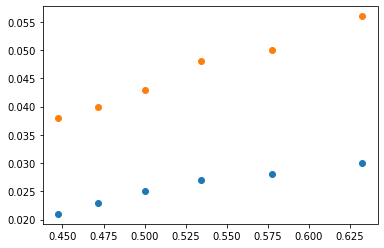

In [3]:
plt.scatter(U**(-1/2), D_1*10**(-2))
plt.scatter(U**(-1/2), D_2*10**(-2))

In [4]:
primera_serie = pd.read_excel('Difraccion.xlsx', sheet_name='Primeros')

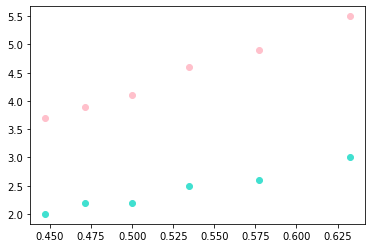

In [5]:
plt.scatter(primera_serie['U [kV]']**(-1/2), primera_serie['D1 [cm]'],c='turquoise')
plt.scatter(primera_serie['U [kV]']**(-1/2), primera_serie['D2 [cm]'],c='pink')
plt.show()

In [6]:
segunda_serie = pd.read_excel('Difraccion.xlsx', sheet_name='Segundos')

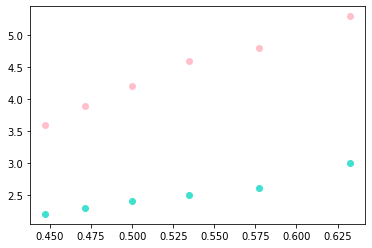

In [7]:
plt.scatter(segunda_serie['U [kV]']**(-1/2), segunda_serie['D1 [cm]'],c='turquoise')
plt.scatter(segunda_serie['U [kV]']**(-1/2), segunda_serie['D2 [cm]'],c='pink')
plt.show()

In [19]:
tercera_serie = pd.read_excel('Difraccion.xlsx', sheet_name='Terceros')

In [26]:
def ajuste_lineal(x,m): 
    return m*x
datos_x = (tercera_serie['U [kV]']*1000)**(-1/2)
x = np.linspace(0, datos_x[0], 1000)
popt_d1, pcov_d1 = curve_fit(ajuste_lineal, datos_x, tercera_serie['D1 [cm]']*10**(-2))
popt_d2, pcov_d2 = curve_fit(ajuste_lineal, datos_x, D_2*10**(-2))

In [25]:
(tercera_serie['U [kV]']*1000)**(-1/2)

0    0.020000
1    0.018257
2    0.016903
3    0.015811
4    0.014907
5    0.014142
Name: U [kV], dtype: float64

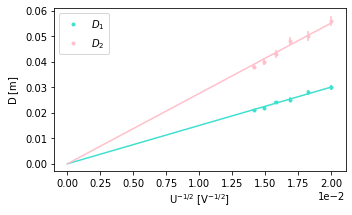

In [52]:
plt.figure(figsize=(5,5/1.61616))
plt.plot(x, popt_d1[0]*x, c='turquoise')
plt.plot(x, popt_d2[0]*x, c='pink')
plt.plot(datos_x, tercera_serie['D1 [cm]']*10**(-2), '.', c='turquoise', label='$D_1$')
plt.plot(datos_x, D_2*10**(-2), '.', c='pink', label='$D_2$')
anchos_d1 = np.array([2,2,2,1,1,1])*10**(-3)
anchos_d2 = np.array([4,4,3,3,3,2])*10**(-3)

for i in range(len(datos_x)):
    plt.errorbar(datos_x[i], tercera_serie['D1 [cm]'][i]*10**(-2), xerr=0.1e-3, c='turquoise')
    plt.errorbar(datos_x[i], tercera_serie['D1 [cm]'][i]*10**(-2), yerr=anchos_d1[i]/2, c='turquoise')
    plt.errorbar(datos_x[i], D_2[i]*10**(-2),xerr=0.1e-3, c='pink')
    plt.errorbar(datos_x[i], D_2[i]*10**(-2),yerr=anchos_d2[i]/2, c='pink')
plt.legend()
plt.xlabel(r'$\mathrm{U}^{-1/2}$ [$\mathrm{V}^{-1/2}]$')
plt.ylabel(r'D [$\mathrm{m}]$')
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.tight_layout()
plt.savefig('grafica.pdf')

In [45]:
def pendiente(d_1,n,L):
    return 2*n*L*h/(d*np.sqrt(2*m_e*e))

In [46]:
print("Pendiente D_1: ", popt_d1[0])
print("Incertidumbre D_1: ", pcov_d1[0][0])

Pendiente D_1:  1.500765630778964
Incertidumbre D_1:  8.95417467172805e-05


In [47]:
print("Pendiente D_2: ", popt_d2[0])
print("Incertidumbre D_2: ", pcov_d2[0][0])

Pendiente D_2:  2.7540221819058965
Incertidumbre D_2:  0.0006303183932875989


In [48]:
def d(n,m,L=13.5e-2):
    return 2*n*L*h/(m*np.sqrt(2*m_e*e))

In [74]:
d1_calc = d(1, popt_d1[0])
d2_calc = d(1, popt_d2[0])

In [77]:
print("d_1 calculado: ",d1_calc, d(1, popt_d1[0])/popt_d1[0] )
print("d_2 calculado: ", d2_calc, d(1, popt_d2[0])/popt_d2[0])

d_1 calculado:  2.2064405265652742e-10 1.4702099257297313e-10
d_2 calculado:  1.2023687137971462e-10 4.3658643045680105e-11


In [35]:
d_1, d_2 = 213.1e-12, 106.6e-12 

In [36]:
def h_calc(n,m,d,L=13.5e-2):
    return m*d*np.sqrt(2*m_e*e)/(2*n*L)

In [80]:
h_nuestra = h_calc(1,popt_d1[0],d_1)

In [83]:
print("Incertidumbre h: ", h_nuestra/popt_d1[0])
print("h:", h_nuestra)

Incertidumbre h:  4.264168700513728e-34
h: 6.3995178295744005e-34


In [39]:
h

6.62607015e-34

### Longitud de onda de de Broglie

In [84]:
d_1, d_2 = 213.1e-12, 106.6e-12 

In [85]:
def l_de_broglie(V):
    return h/np.sqrt(2*m_e*e*V)

def l_bragg(d, n, D, L=13.5e-2):
    return 2*d/n * np.sin(0.5* np.arctan(0.5*D/L))

In [86]:
U = np.arange(2.5,5.5,0.5) #kV
U = U*10**(3) #V

In [87]:
de_broglie = l_de_broglie(U) 
bragg_1 = l_bragg(d_1, 1, tercera_serie['D1 [cm]']*10**(-2))
bragg_2 = l_bragg(d_2, 1, D_2*10**(-2))

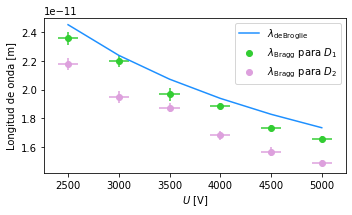

In [88]:
plt.figure(figsize=(5,5/1.61616))
plt.plot(U, de_broglie, c='dodgerblue', label='$\lambda_{\mathrm{de Broglie}}$')
plt.scatter(U, bragg_1, c='limegreen', label='$\lambda_{\mathrm{Bragg}}$ para $D_1$')
plt.scatter(U, bragg_2, c='plum', label='$\lambda_{\mathrm{Bragg}}$ para $D_2$')
for i in range(len(U)):
    plt.errorbar(U[i], bragg_1[i], xerr=100, c='limegreen')
    plt.errorbar(U[i], bragg_1[i], yerr=d_1*anchos_d1[i], c='limegreen' )
    plt.errorbar(U[i], bragg_2[i], xerr=100, c='plum')
    plt.errorbar(U[i], bragg_2[i], yerr=d_2*anchos_d2[i], c='plum' )


plt.legend()
plt.xlabel('$U$ [V]')
plt.ylabel('Longitud de onda [m]')
plt.tight_layout()
plt.savefig('lambdas.pdf')